In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14, 8,19, 7,24]
})

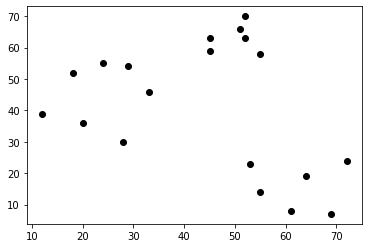

In [3]:
plt.scatter(df['x'], df['y'], color='k')

# Step 1: Choose the number of clusters k
The first step in k-means is to pick the number of clusters, k.

In [4]:
np.random.seed(200)
k = 3

# Step 2: Select k random points from the data as centroids
Next, we randomly select the centroid for each cluster. Let’s say we want to have 2 clusters, so k is equal to 2 here. We then randomly select the centroid:

In [5]:
xmin = min(df['x'])
xmax = max(df['x'])
ymin = min(df['y'])
ymax = max(df['y'])
centroids = {
    i+1: [np.random.randint(xmin, xmax), np.random.randint(ymin,ymax)]
    for i in range(k)
}
centroids

{1: [38, 48], 2: [28, 11], 3: [54, 62]}

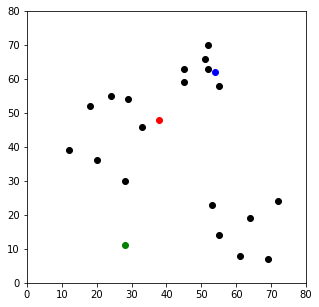

In [6]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

Here, the blue , red and green circles represent the centroid for these clusters.

# Step 3: Assign all the points to the closest cluster centroid
Once we have initialized the centroids, we assign each point to the closest cluster centroid:

In [7]:
def assign(df, centroids):
    for i in centroids.keys():
        df['distance_from_'+ str(i)] = (
            np.sqrt((df['x'] - centroids[i][0])** 2 + (df['y'] - centroids[i][1])** 2)
        )
    centroid_distance = ['distance_from_' + str(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x:colmap[x])
    return df
# 1069

# Step 4: Recompute the centroids of newly formed clusters
Now, once we have assigned all of the points to either cluster, the next step is to compute the centroids of newly formed clusters:

In [8]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [9]:
def plot(df, centroids):
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()

# Step 5: Repeat steps 3 and 4

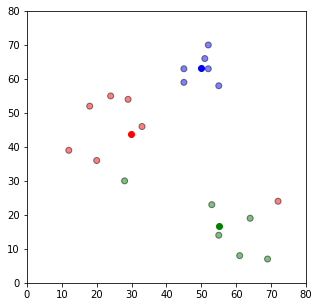

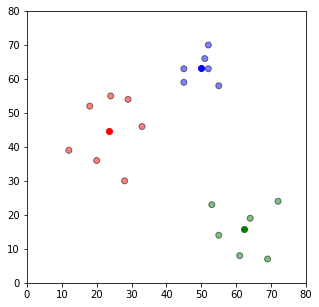

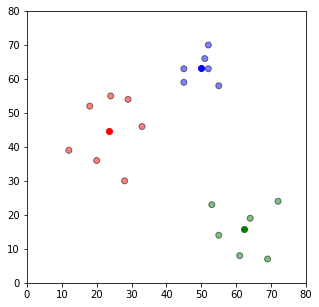

In [10]:
import copy as cp
old_centroids = {}
while old_centroids != centroids:
    old_centroids = cp.deepcopy(centroids)
    df = assign(df, centroids)
    centroids = update(centroids)
    plot(df, centroids)